# Week 2 Assignment: Data Exploration
## Exploring LIHTC Projects in California

This assignment delves into data of all Low-Income Housing Tax Credit (LIHTC) projects as of 2020, accessed through the U.S. Department of Housing and Urban Development (HUD) [LIHTC Database portal](https://lihtc.huduser.gov/). This dataset includes project location and characteristics such as year serviced, number of low-income units, etc. that may be used to understand trends in the distribution of federally-funded affordable housing developments across the nation. 

**In this notebook, we will:**
- Explore dataset
- Identify columns of interest
- Create visualizations:
    - Map depicting distribution of projects across the state
    - Line graph counting number of projects rewarded over time
    - Bar graph of the top ten cities with the greatest number of projects
    - Bar graph of the total number of units developed in these top ten cities



<div class="alert alert-info">
Start by importing modules to gain access to their functions for data analysis.

In [1]:
import pandas as pd
import geopandas as gpd

Next, we import the LIHTC dataset (.csv format). Note that this version of the dataset has already been filtered to projects within California due to the nature of the portal.

In [2]:
# Read and add csv file to notebook as 'lihtc_ca'.
lihtc_ca = pd.read_excel('LIHTC_CA_012123.xlsx')

## Data Exploration

### Understanding the dataset

In [3]:
# Run shape command to view the dimensions of the dataset.
lihtc_ca.shape

(4457, 14)

This dataset contains 4457 rows and 14 columns. In other words, there are a total of 4457 LIHTC projects in California and 14 characteristics reported within the downloaded dataset.

In [4]:
# Run info command to get a more detailed understanding of the dataset and the datatypes for each entry.
lihtc_ca.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HUD ID Number:                   4457 non-null   object 
 1   Project Name:                    4457 non-null   object 
 2   Project Address:                 4434 non-null   object 
 3   Project City:                    4456 non-null   object 
 4   Project State:                   4457 non-null   object 
 5   Project ZIP Code:                4353 non-null   object 
 6   Project's Latitude:              4393 non-null   float64
 7   Project's Longitude:             4393 non-null   float64
 8   Total Number of Units:           4455 non-null   float64
 9   Total Low-Income Units:          4340 non-null   float64
 10  Placed-In-Service Year:          4457 non-null   int64  
 11  Credit Allocation Year:          4457 non-null   int64  
 12  For-profit/non-profi

In [5]:
# Additionally, this command yields the column names.
lihtc_ca.columns

Index(['HUD ID Number:', 'Project Name:', 'Project Address:', 'Project City:',
       'Project State:', 'Project ZIP Code:', 'Project's Latitude:',
       'Project's Longitude:', 'Total Number of Units:',
       'Total Low-Income Units:', 'Placed-In-Service Year:',
       'Credit Allocation Year:', 'For-profit/non-profit Sponsor:',
       'Annual LIHTC Allocation Amount:'],
      dtype='object')

In [6]:
# This command outputs a preview of dataframe.
lihtc_ca.head()

,HUD ID Number:,Project Name:,Project Address:,Project City:,Project State:,Project ZIP Code:,Project's Latitude:,Project's Longitude:,Total Number of Units:,Total Low-Income Units:,Placed-In-Service Year:,Credit Allocation Year:,For-profit/non-profit Sponsor:,Annual LIHTC Allocation Amount:
0,CAA00000241,WILHELMINA APTS,508 E WILHELMINA ST,ANAHEIM,CA,92805,33.843075,-117.910812,11.0,NaN,8888,2011,Status Not Available,NaN
1,CAA00000242,WILLIAM PENN MANOR,7025 FRIENDS AVE,WHITTIER,CA,90602,33.978092,-118.034065,74.0,NaN,8888,8888,Status Not Available,NaN
2,CAA00000243,WILLOW VILLAGE,1150 N WILLOW AVE,RIALTO,CA,92376,34.119900,-117.374969,93.0,NaN,8888,8888,Status Not Available,NaN
3,CAA00000244,WLCAC RAMONA ESTATES LP,1935 E 122ND ST,COMPTON,CA,90222,33.921860,-118.237518,57.0,NaN,8888,8888,Status Not Available,NaN
4,CAA00000245,ADELINE STREET PROPERTY,2918 ADELINE ST,BERKELEY,CA,94703,37.855255,-122.271408,6.0,6.0,8888,1988,Status Not Available,NaN


### Map of LIHTC Projects in California

In [7]:
import folium

In [8]:
m = folium.Map(location = [36.778259, -119.417931], tiles = 'OpenStreetMap', zoom_start = 6)

In [9]:
# Keep rows with latitude and logitude values -- drop rows where coordinate data are missing
lihtc_ca_map = lihtc_ca[lihtc_ca["Project's Latitude:"].notna()]
lihtc_ca_map = lihtc_ca[lihtc_ca["Project's Longitude:"].notna()]
lihtc_ca_map

,HUD ID Number:,Project Name:,Project Address:,Project City:,Project State:,Project ZIP Code:,Project's Latitude:,Project's Longitude:,Total Number of Units:,Total Low-Income Units:,Placed-In-Service Year:,Credit Allocation Year:,For-profit/non-profit Sponsor:,Annual LIHTC Allocation Amount:
0,CAA00000241,WILHELMINA APTS,508 E WILHELMINA ST,ANAHEIM,CA,92805,33.843075,-117.910812,11.0,NaN,8888,2011,Status Not Available,NaN
1,CAA00000242,WILLIAM PENN MANOR,7025 FRIENDS AVE,WHITTIER,CA,90602,33.978092,-118.034065,74.0,NaN,8888,8888,Status Not Available,NaN
2,CAA00000243,WILLOW VILLAGE,1150 N WILLOW AVE,RIALTO,CA,92376,34.119900,-117.374969,93.0,NaN,8888,8888,Status Not Available,NaN
3,CAA00000244,WLCAC RAMONA ESTATES LP,1935 E 122ND ST,COMPTON,CA,90222,33.921860,-118.237518,57.0,NaN,8888,8888,Status Not Available,NaN
4,CAA00000245,ADELINE STREET PROPERTY,2918 ADELINE ST,BERKELEY,CA,94703,37.855255,-122.271408,6.0,6.0,8888,1988,Status Not Available,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,CAA20200046,PLACENTIA VETERANS VILLAGE,1945 VETERANS WAY,PLACENTIA,CA,92870,33.865845,-117.820572,50.0,49.0,2020,2018,Non-Profit Sponsor,1731403
4453,CAA20200047,PORTOLA SENIOR APARTMENTS,700 THIRD AVENUE,PORTOLA,CA,96122,39.808800,-120.478043,50.0,49.0,2020,2018,Non-Profit Sponsor,2711517
4454,CAA20200049,RENASCENT PLACE,2450 SENTER RIAD,SAN JOSE,CA,95111,37.280899,-121.829597,162.0,160.0,2020,2017,Non-Profit Sponsor,2041688
4455,CAA20200050,RIVER BLUFF COTTAGES,355 CENTER STREET,RIO DELL,CA,95562,40.501945,-124.099121,26.0,25.0,2020,2018,Non-Profit Sponsor,629240


<div class="alert alert-danger">
Please note: The following code will take a while to load...

In [24]:
# Adds markers to the map where there are projects, according to their coordinates.
for index, row in lihtc_ca_map.iterrows():
    lat = lihtc_ca_map.at[index, "Project's Latitude:"]
    long = lihtc_ca_map.at[index, "Project's Longitude:"]
    popup = 'Project Name:' + lihtc_ca['Project Name:']
    folium.Marker(location = [lat, long], popup = popup, icon = folium.Icon(color='blue')).add_to(m)
m # please uncomment to view the final map
m.save('LIHTC_CA_Locations.html')

### LIHTC Projects Over Time (California)

In [11]:
year_count = lihtc_ca['Credit Allocation Year:'].value_counts() # Create a new dataframe counting the number of projects per year
year_count = year_count.reset_index() 
year_count.columns = ['Year', 'Count'] # Renames columns for easier viewing
year_count = year_count.sort_values('Year') # Sorts dataframe by year in chronological order
year_count = year_count.drop([30]) # Drops row 30 where 'Year' data is missing (where Year = 8888)

In [12]:
year_count # Displays dataframe

,Year,Count
32,1987,44
17,1988,142
20,1989,121
29,1990,68
31,1991,56
25,1992,94
24,1993,96
26,1994,89
27,1995,70
22,1996,107


<AxesSubplot: title={'center': 'Number of LIHTC Projects Over Time'}, xlabel='Year'>

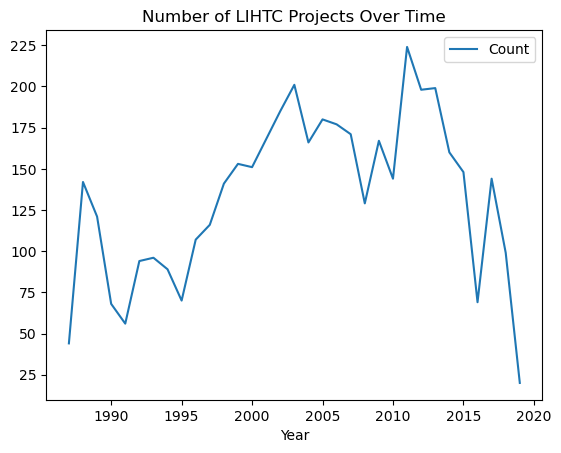

In [13]:
year_count.plot(x = 'Year', y = 'Count', title = 'Number of LIHTC Projects Over Time') # Creates plot graph using these inputs

This graph indicates that the number of LIHTC projects vary greatly by year. There seems to be less projects in more recent years.

### Top Ten Cities With The Greatest Number of LIHTC Projects

In [14]:
# grab the total projects in the top ten cities
city_count = lihtc_ca['Project City:'].value_counts() # Counts the occurences of unique values
city_count = city_count.reset_index()
city_count.columns = ['City', 'Count'] # Renames columns
city_count

,City,Count
0,LOS ANGELES,562
1,SAN FRANCISCO,191
2,SAN JOSE,159
3,SAN DIEGO,150
4,SACRAMENTO,131
...,...,...
533,RUBIDOUX,1
534,ROSEMEAD,1
535,HAWAIIAN GARDENS,1
536,RIO VISTA,1


In [15]:
city_count_top_ten = city_count[0:9]
city_count_top_ten #grab top ten occurences

,City,Count
0,LOS ANGELES,562
1,SAN FRANCISCO,191
2,SAN JOSE,159
3,SAN DIEGO,150
4,SACRAMENTO,131
5,OAKLAND,123
6,FRESNO,76
7,BAKERSFIELD,59
8,ANAHEIM,47


<AxesSubplot: title={'center': 'Top Ten Cities With The Most LIHTC Projects'}, xlabel='City'>

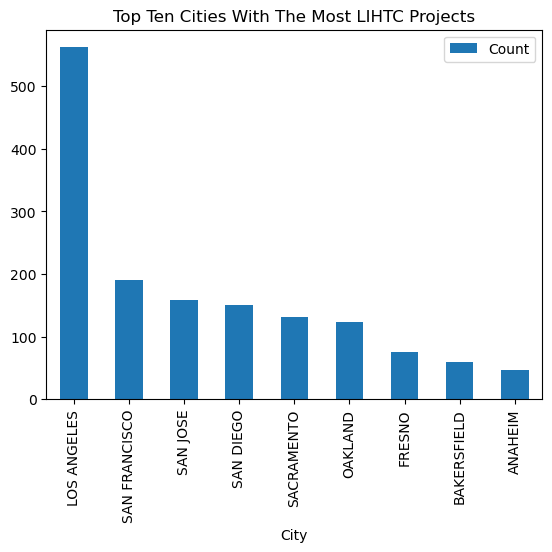

In [16]:
# Graph
city_count_top_ten.plot.bar(x = 'City', y = 'Count', title = 'Top Ten Cities With The Most LIHTC Projects')

In [17]:
city_count.set_index(["City"])

,Count
City,
LOS ANGELES,562
SAN FRANCISCO,191
SAN JOSE,159
SAN DIEGO,150
SACRAMENTO,131
...,...
RUBIDOUX,1
ROSEMEAD,1
HAWAIIAN GARDENS,1


### Top Ten Cities With The Greatest Number of LIHTC Units

In [18]:
# grab the total units in the top ten cities
unit_count = lihtc_ca.groupby ('Project City:').agg({'Total Number of Units:':['sum']}) # Groups the data by city and aggregates the sum of total number of units for each city.
unit_count = unit_count.reset_index()
unit_count.columns = ['City', 'Total Number of Units'] # Renames columns
unit_count

,City,Total Number of Units
0,ADELANTO,192.0
1,ALAMEDA,324.0
2,ALBANY,16.0
3,ALHAMBRA,205.0
4,ALISO VIEJO,328.0
...,...,...
533,YOUNTVILLE,36.0
534,YREKA,285.0
535,YUBA CITY,169.0
536,YUCAIPA,145.0


In [19]:
# testing to make sure the commands were executed accordingly by comparing one city to the original dataset

test = lihtc_ca[lihtc_ca['Project City:'] == 'LOS ANGELES'] # Filter dataset to one city to count total number of LIHTC units in that city.
test_count = test['Total Number of Units:'].sum() # Perform function to get sum of all values in the column of interest.
test_count

37850.0

**Looks good!**

In [20]:
unit_count_top_ten = unit_count.sort_values('Total Number of Units', ascending=False)[0:9]
unit_count_top_ten #grab top ten occurences

,City,Total Number of Units
248,LOS ANGELES,37850.0
412,SAN JOSE,19344.0
409,SAN FRANCISCO,19226.0
398,SACRAMENTO,16459.0
406,SAN DIEGO,15069.0
318,OAKLAND,8937.0
153,FRESNO,7229.0
27,BAKERSFIELD,5153.0
246,LONG BEACH,4518.0


<AxesSubplot: title={'center': 'Top Ten Cities With The Most LIHTC Units'}, xlabel='City'>

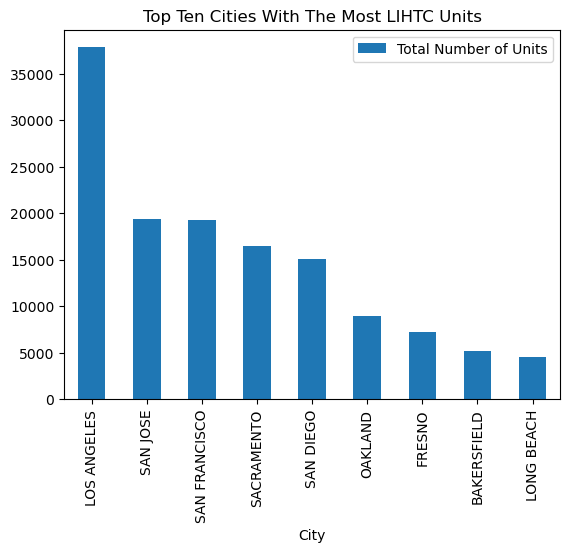

In [21]:
# Graph
unit_count_top_ten.plot.bar(x = 'City', y = 'Total Number of Units', title = 'Top Ten Cities With The Most LIHTC Units')

### Putting it all together...(for later)

In [22]:
lihtc_totals = unit_count.merge(city_count, left_on = 'City',right_on = 'City')

lihtc_totals.sort_values('Count', ascending=False)


,City,Total Number of Units,Count
248,LOS ANGELES,37850.0,562
409,SAN FRANCISCO,19226.0,191
412,SAN JOSE,19344.0,159
406,SAN DIEGO,15069.0,150
398,SACRAMENTO,16459.0,131
...,...,...,...
400,SAMOA,80.0,1
404,SAN CARLOS,16.0,1
191,HOOPA,12.0,1
407,SAN DIMAS,65.0,1
